## Cloning Git Repo

In [1]:
!git clone https://github.com/mkthoma/grad_CAM_cifar10.git

## Installing dependancies

In [2]:
!pip install albumentations
!pip install grad-cam
!pip install torchsummary
!pip install torch-lr-finder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.8-py3-none-any.whl size=38247 sha256=9d5cc5bf982780f586b899515afffa3913979feeb2865ef42d93ef977193e9d7
  Stored in directory: /root/.cache/pip/wheels/f8/04/36/94ff3c8a4215826a21946b34c01180817e606989fdf53f7cd6
Successfully built grad-cam


## Importing libraries

In [3]:

from __future__ import print_function
from grad_CAM_cifar10.models.resnet import ResNet18
from grad_CAM_cifar10.utils import *
from grad_CAM_cifar10.main import *


/usr/local/lib/python3.10/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## Selecting device as CUDA

In [4]:
device = select_cuda()

Device used:  cuda


## Download CIFAR10 data and apply augmentations

In [5]:
train_data, test_data, train_loader, test_loader, classes = download_data()

100%|██████████| 170498071/170498071 [00:14<00:00, 11726596.59it/s]


Extracting /root/data/cifar10/cifar-10-python.tar.gz to /root/data/cifar10


/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Unique classes of images are: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#Analyizing data

### Random images

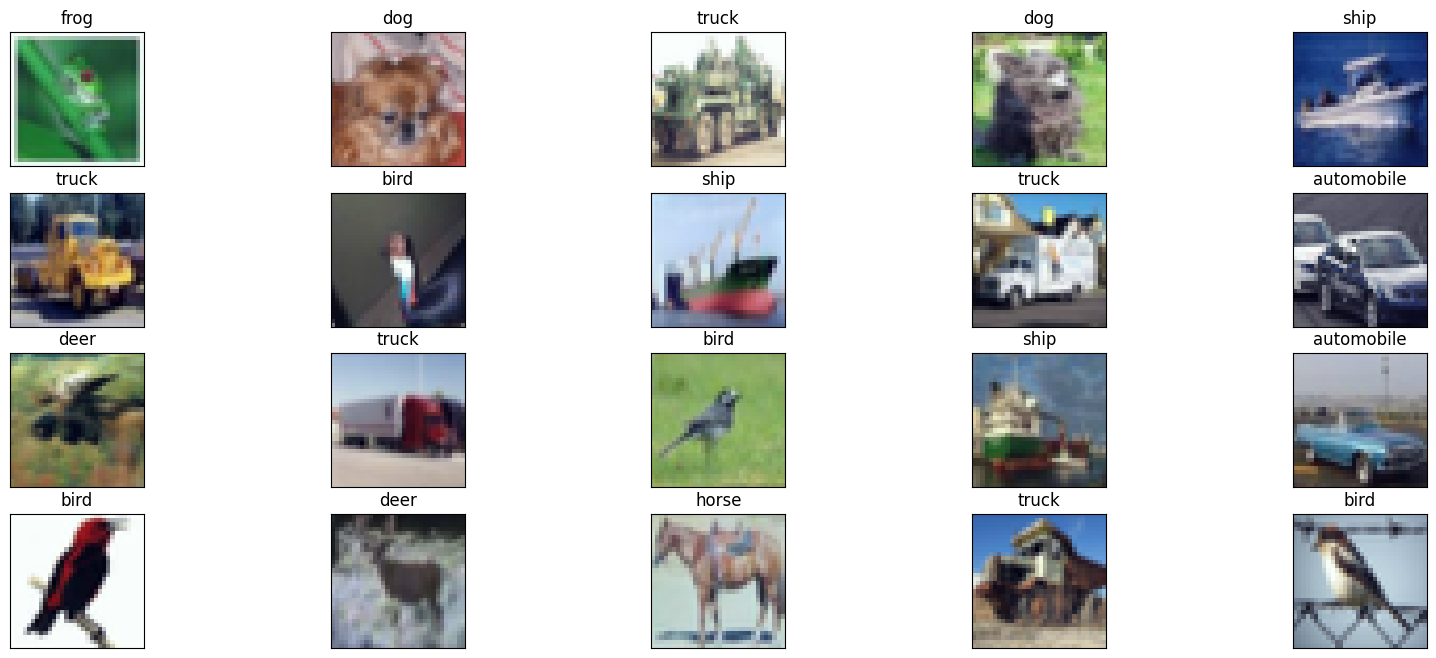

In [6]:
show_random_samples(test_loader, classes)

### Images with transformations applied

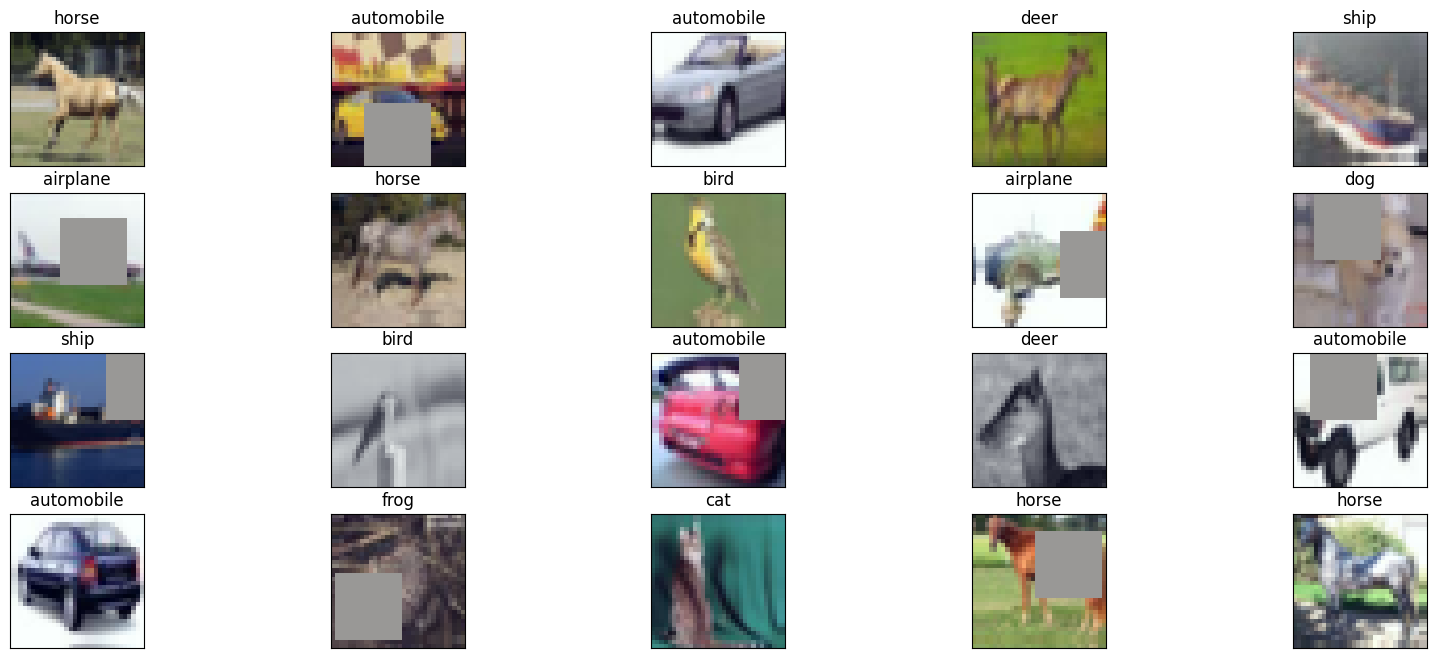

In [7]:
show_random_samples(train_loader, classes)

### Images from each class

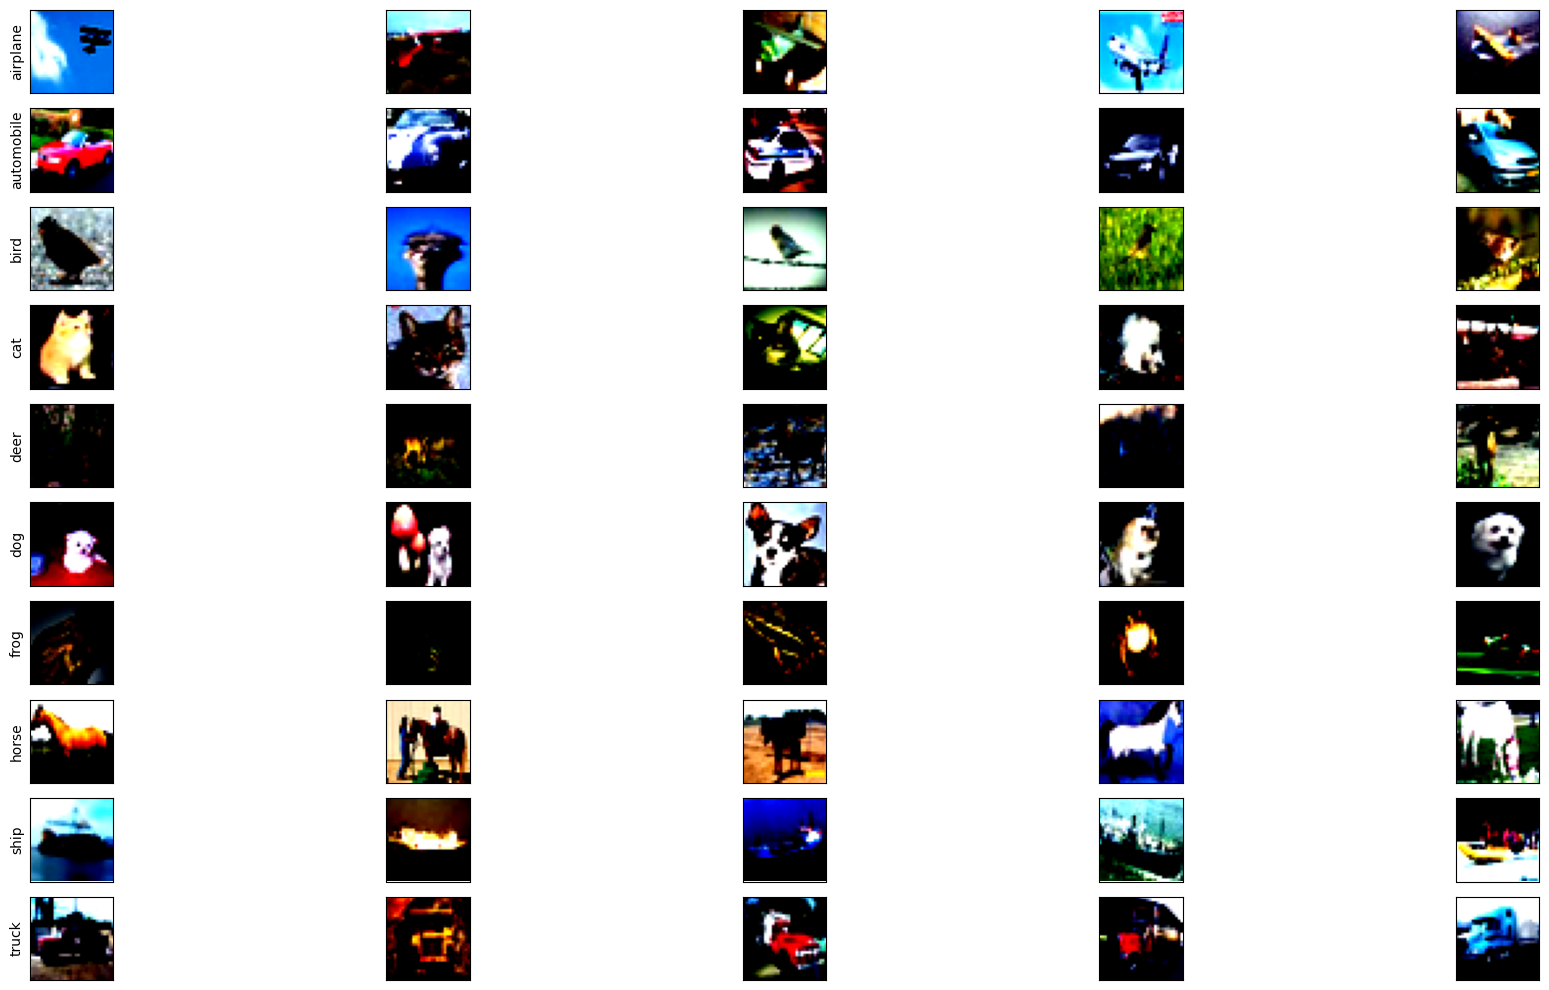

In [8]:
show_class_samples(test_loader, classes)

### RGB channels of one image

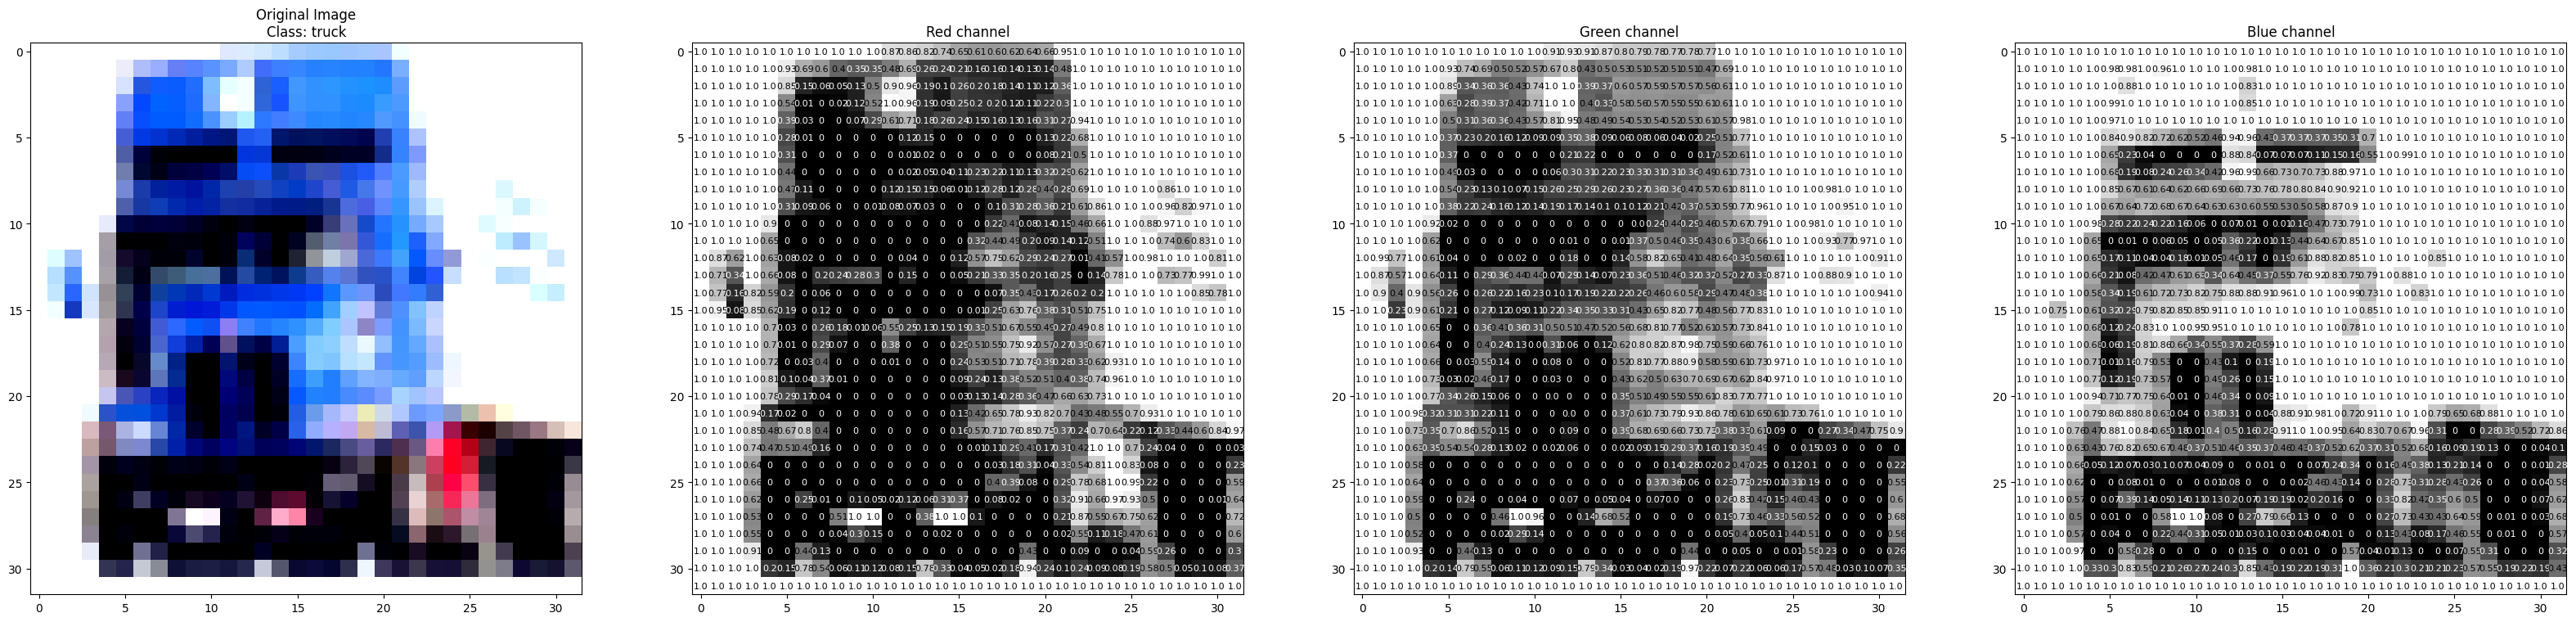

In [9]:
show_image_rgb(test_loader, classes)

## Selecting model

In [10]:
model = select_model(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

## Finding max LR

  0%|          | 0/100 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 4.64E-01


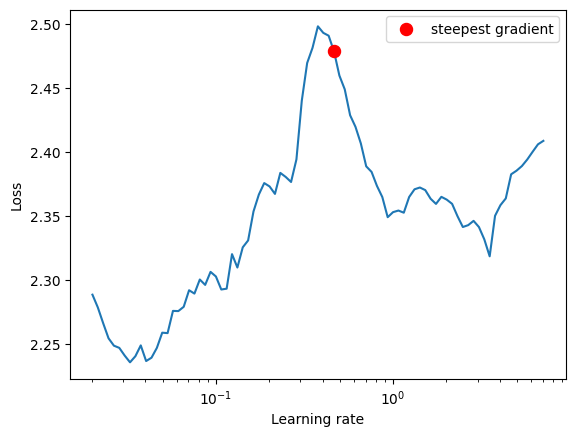

In [11]:
max_LR = max_lr(model, train_loader)

## Applying model to data for train and testing

In [16]:
train_test_loop(model, device, train_loader, test_loader, max_LR, lr_scheduler="OneCycle")

EPOCH: 1


Batch_id=390: 100%|██████████| 391/391 [00:47<00:00,  8.30it/s]


Train Average Loss: 1.2595
Train Accuracy: 56.21%
Maximum Learning Rate:  0.09659208123909749
Test Average loss: 1.0208
Test Accuracy: 65.28%


EPOCH: 2


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]


Train Average Loss: 0.9262
Train Accuracy: 67.96%
Maximum Learning Rate:  0.1885425736445822
Test Average loss: 0.8716
Test Accuracy: 71.79%


EPOCH: 3


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]


Train Average Loss: 0.7531
Train Accuracy: 73.69%
Maximum Learning Rate:  0.28049306605006685
Test Average loss: 0.7573
Test Accuracy: 74.70%


EPOCH: 4


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.36it/s]


Train Average Loss: 0.6502
Train Accuracy: 77.29%
Maximum Learning Rate:  0.3724435584555516
Test Average loss: 0.6477
Test Accuracy: 78.74%


EPOCH: 5


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.37it/s]


Train Average Loss: 0.5741
Train Accuracy: 80.07%
Maximum Learning Rate:  0.4640797508007541
Test Average loss: 0.5637
Test Accuracy: 81.62%


EPOCH: 6


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.43it/s]


Train Average Loss: 0.5080
Train Accuracy: 82.22%
Maximum Learning Rate:  0.4331389196358913
Test Average loss: 0.5174
Test Accuracy: 83.10%


EPOCH: 7


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]


Train Average Loss: 0.4434
Train Accuracy: 84.58%
Maximum Learning Rate:  0.4021980884710285
Test Average loss: 0.4325
Test Accuracy: 85.48%


EPOCH: 8


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.42it/s]


Train Average Loss: 0.4067
Train Accuracy: 85.85%
Maximum Learning Rate:  0.3712572573061657
Test Average loss: 0.4377
Test Accuracy: 85.80%


EPOCH: 9


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]


Train Average Loss: 0.3639
Train Accuracy: 87.28%
Maximum Learning Rate:  0.3403164261413029
Test Average loss: 0.3738
Test Accuracy: 87.60%


EPOCH: 10


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]


Train Average Loss: 0.3209
Train Accuracy: 88.68%
Maximum Learning Rate:  0.3093755949764401
Test Average loss: 0.4923
Test Accuracy: 85.16%


EPOCH: 11


Batch_id=390: 100%|██████████| 391/391 [00:45<00:00,  8.51it/s]


Train Average Loss: 0.2947
Train Accuracy: 89.65%
Maximum Learning Rate:  0.27843476381157733
Test Average loss: 0.3495
Test Accuracy: 88.74%


EPOCH: 12


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.50it/s]


Train Average Loss: 0.2643
Train Accuracy: 90.54%
Maximum Learning Rate:  0.24749393264671454
Test Average loss: 0.3489
Test Accuracy: 88.85%


EPOCH: 13


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.48it/s]


Train Average Loss: 0.2358
Train Accuracy: 91.80%
Maximum Learning Rate:  0.21655310148185172
Test Average loss: 0.3423
Test Accuracy: 89.31%


EPOCH: 14


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]


Train Average Loss: 0.2135
Train Accuracy: 92.43%
Maximum Learning Rate:  0.18561227031698896
Test Average loss: 0.3614
Test Accuracy: 89.23%


EPOCH: 15


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.49it/s]


Train Average Loss: 0.1948
Train Accuracy: 93.12%
Maximum Learning Rate:  0.15467143915212617
Test Average loss: 0.3493
Test Accuracy: 89.39%


EPOCH: 16


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]


Train Average Loss: 0.1656
Train Accuracy: 94.10%
Maximum Learning Rate:  0.12373060798726337
Test Average loss: 0.3388
Test Accuracy: 90.50%


EPOCH: 17


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.45it/s]


Train Average Loss: 0.1481
Train Accuracy: 94.78%
Maximum Learning Rate:  0.09278977682240058
Test Average loss: 0.3462
Test Accuracy: 90.43%


EPOCH: 18


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.44it/s]


Train Average Loss: 0.1250
Train Accuracy: 95.64%
Maximum Learning Rate:  0.06184894565753779
Test Average loss: 0.3461
Test Accuracy: 90.76%


EPOCH: 19


Batch_id=390: 100%|██████████| 391/391 [00:46<00:00,  8.49it/s]


Train Average Loss: 0.1043
Train Accuracy: 96.38%
Maximum Learning Rate:  0.030908114492675
Test Average loss: 0.3372
Test Accuracy: 90.90%


EPOCH: 20


Batch_id=390: 100%|██████████| 391/391 [00:45<00:00,  8.50it/s]


Train Average Loss: 0.0858
Train Accuracy: 97.12%
Maximum Learning Rate:  -3.2716672187793616e-05
Test Average loss: 0.3224
Test Accuracy: 91.74%




## Training/Testing loss and accuracies

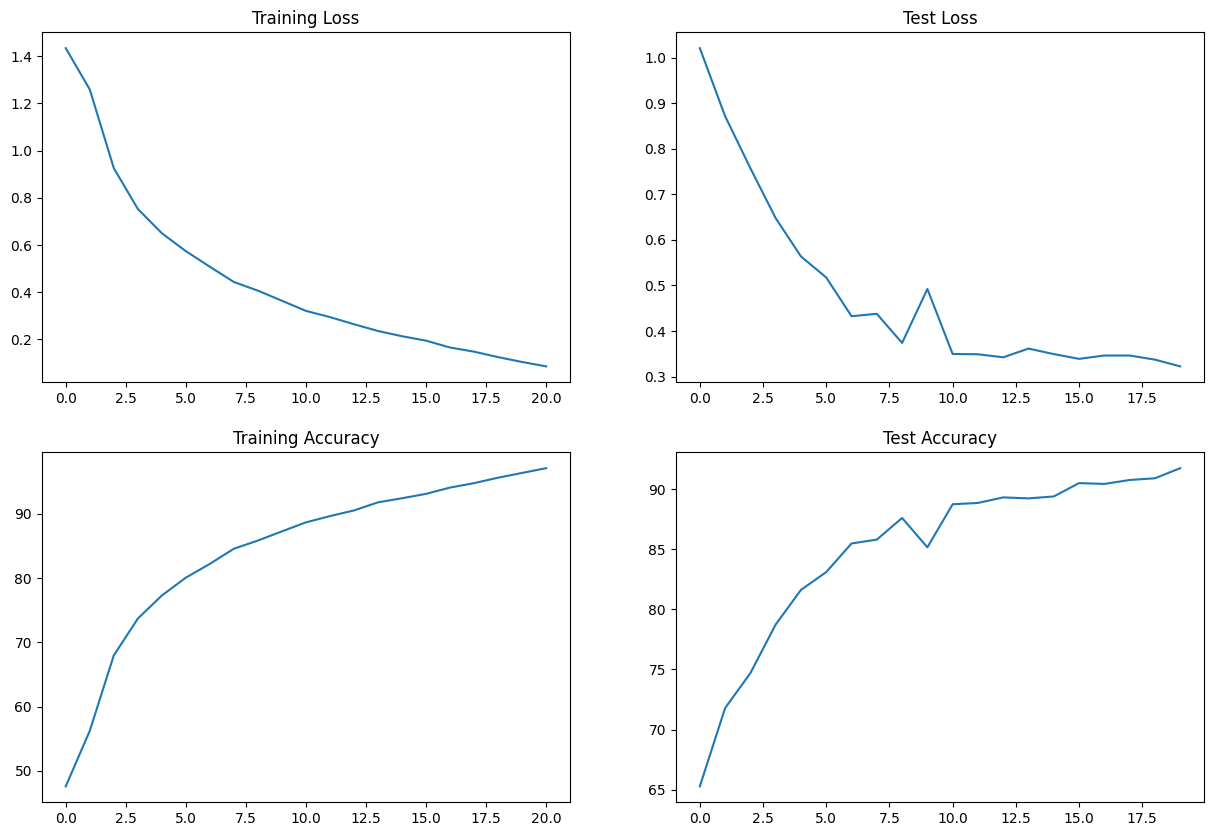

In [17]:
show_accuracy_loss(train_losses, train_accuracies, test_losses, test_accuracies)

## Plotting misclassified images

Misclassified images



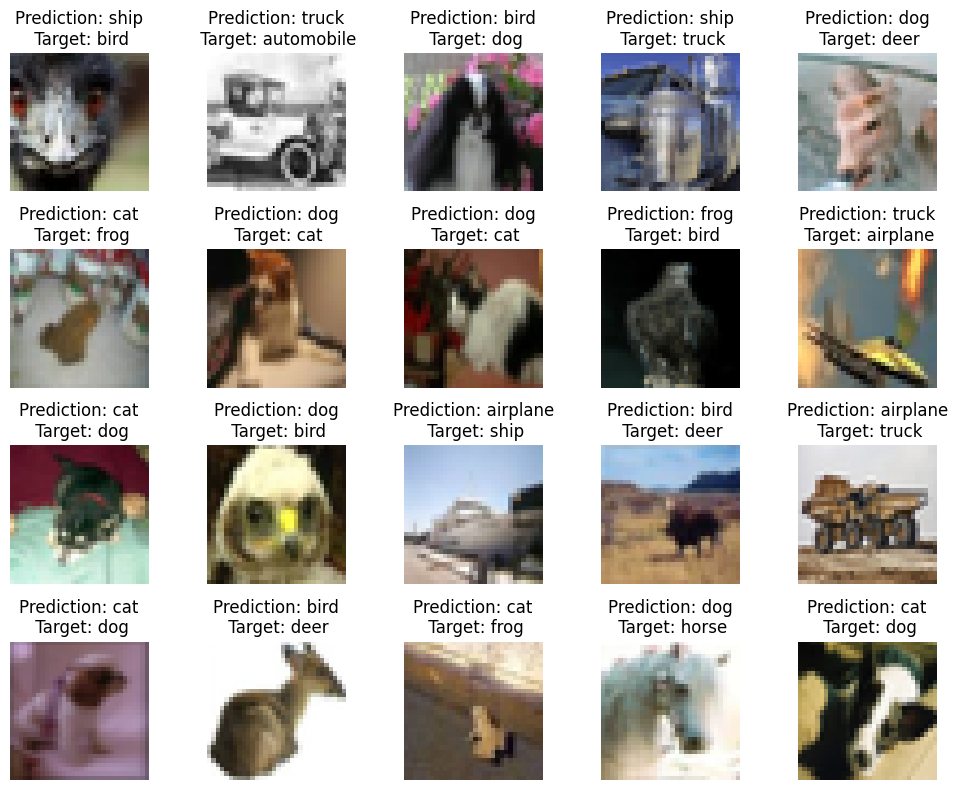



Misclassified images using GradCAM



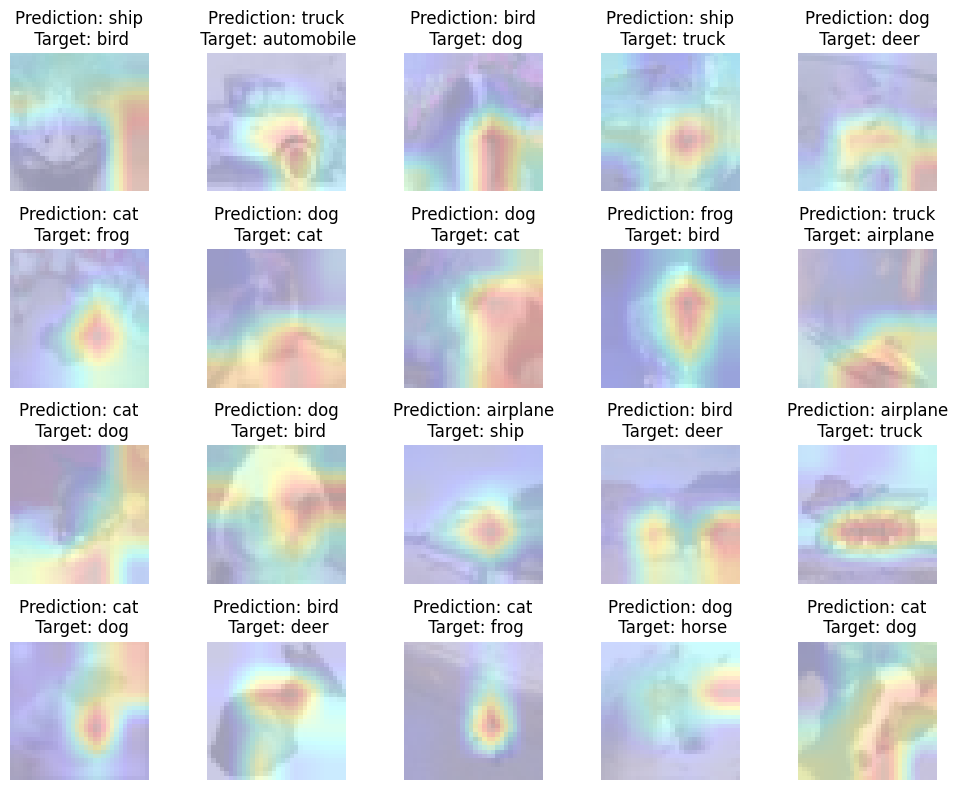

In [18]:
plot_misclassified(model, test_loader, classes, device, no_misclf=20, plot_size=(4,5), grad_CAM=True)